<a href="https://colab.research.google.com/github/girlstalkmath-umd/network-models-and-algoritms/blob/main/girlsTalkMath_networkAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Network Algorithms

This notebook is the Python implementation of the [network package](https://github.com/girlstalkmath-umd/network_models_and_algorithms) created for GirlsTalkMath@University of Maryland.

**Author:** Yuexi (Tracy) Chen

**Email:** ychen151@umd.edu

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Graph theory basics

## 1.1 draw graphs

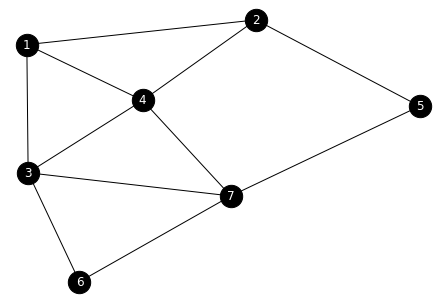

In [ ]:
# let's draw the graph in figure.1
G = nx.Graph()
G.add_edges_from([(1, 2),(1, 3),(1, 4),(2,4),(2,5),(3,4),(3,6),(3,7),(4,7),(5,7),(6,7)])
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white")
plt.show()
# note the layout might be different from Fig. 1, but the connections among nodes are the same.

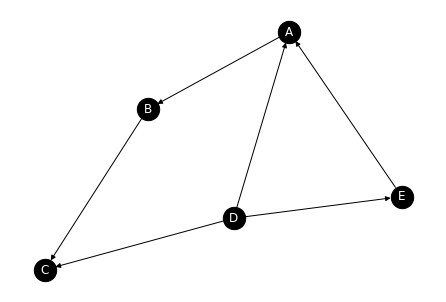

In [ ]:
# let's draw a directed graph like Fig.3
G = nx.DiGraph()
# note the order matters! ('A', 'B') is not the same as ('B', 'A')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('D', 'C'), ('D', 'A'),
     ('D', 'E'), ('E', 'A')])

nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white")
plt.show()

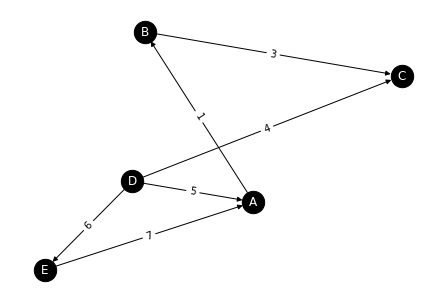

In [ ]:
# let's add some edge weights to the above network
G = nx.DiGraph()
G.add_weighted_edges_from([('A', 'B', 1), ('B', 'C', 3), ('D', 'C', 4), ('D', 'A', 5),
     ('D', 'E', 6), ('E', 'A', 7)])

# get positions of nodes, here we use a spring layout, note we also use a random seed for reproducibility
spring_pos=nx.spring_layout(G, seed=123)
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white", pos=spring_pos)

# draw edge labels
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, spring_pos, edge_labels=edge_labels)
plt.show()
# note the layout might be different from Fig. 3, but the connections among nodes are the same.

## 1.2 adjacency matrices and lists

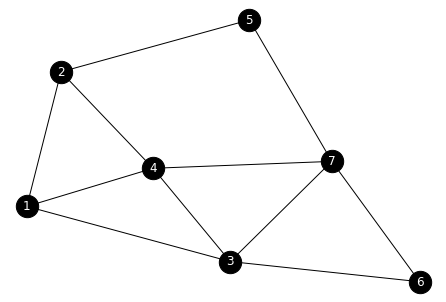

In [ ]:
# let's create the adjacency matrix in Fig. 4
A = np.array([
    [0,1,1,1,0,0,0],
    [1,0,0,1,1,0,0],
    [1,0,0,1,0,1,1],
    [1,1,1,0,0,0,1],
    [0,1,0,0,0,0,1],
    [0,0,1,0,0,0,1],
    [0,0,1,1,1,1,0]
])

# then draw the graph from the adjacency matrix
G = nx.from_numpy_matrix(A)  
# numpy arrays are 0-indexed, let's convert it to be 1-indexed
mapping = {k:"{}".format(k+1) for k in G.nodes()}
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")
plt.show()

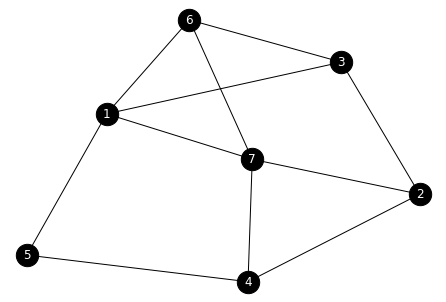

In [ ]:
# let's create the adjacency list in Fig. 7
adjacency_list = {
    1: [3, 5, 6, 7],
    2: [3, 4, 7],
    3: [6],
    4: [2, 5],
    5: [],
    6: [1],
    7: [4, 6]
}

converted = []
# convert to edges
for (key, values) in adjacency_list.items():
    for val in values:
        converted.append("%d %d"%(key, val))
G = nx.parse_edgelist(converted, nodetype = int)
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")

# 2. Paths and cycles

## 2.1 Matrix Production


In [ ]:
# let's take exercise 4 as an example
A = np.array([
    [-1,-1,0],
    [5, 4, 6],
    [2, -4, 5]
])
B = np.array([
    [1, 6, 5],
    [5, -3, 4],
    [-4, 5, -3]
])

In [ ]:
# there are multiple ways to do 2D matrix multiplication in Python
# 1.use np.dot (don't use it if the matrix is of 3D or higher!)
print(np.dot(A, B))
# 2. use np.matmul
print(np.matmul(A, B))
# 2. use @
print(A@B)

[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]
[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]
[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]


In [ ]:
# use reduce to multiply a chain of matrix
from functools import reduce
# suppose we want to get A@A@A@A@A
n = 5
matrix_chain = [A] * n
reduce(np.dot, matrix_chain)

array([[  1100,   1685,    954],
       [-10333,  -3509, -15834],
       [  -508,  10874,  -6943]])

## 2.2 Find connected components of an undirected network ¶

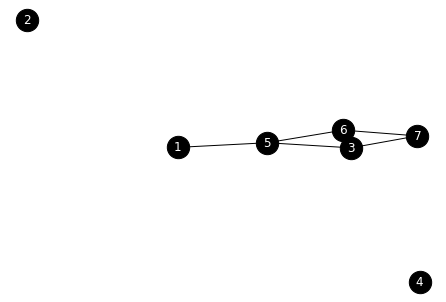

In [ ]:
# let's try to find connected components in undirected networks
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,5), (3,5), (3,6), (3,7), (5,6), (6,7)])
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")

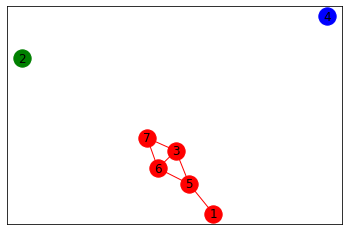

In [ ]:
# let's color different components
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]
connected_components = list(G.subgraph(c) for c in nx.connected_components(G))
spring_pos = nx.spring_layout(G, seed=123)
for index, subgraph in enumerate(connected_components): 
    nx.draw_networkx(subgraph, pos = spring_pos, node_color = colorlist[index], edge_color = colorlist[index])

## 2.3 Find Euclerian cycles and paths ¶


Eulerian path
[(1, 6), (6, 2), (2, 4), (4, 5), (5, 1), (1, 3), (3, 2), (2, 1)]
Eulerian cycle
[(1, 6), (6, 2), (2, 4), (4, 5), (5, 1), (1, 3), (3, 2), (2, 1)]


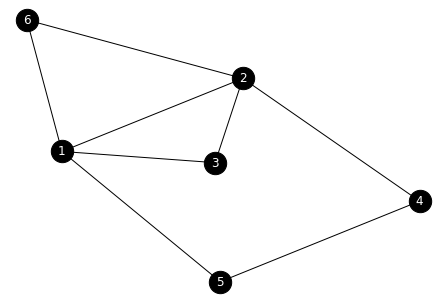

In [ ]:
# let's  take exercise 11.(c) as an example
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,5), (1,6), (2,3), (2,4), (2,6), (4,5)])
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")
if nx.has_eulerian_path(G):
    print("Eulerian path")
    print(list(nx.eulerian_path(G)))
print("Eulerian cycle")
print(list(nx.eulerian_circuit(G)))

# 3. Algorithms


## 3.1 Breadth-first  search  (BFS)
Breadth-first  search (BFS) is an algorithm used to find the shortest path in an **unweighted** network from a start node to a destination node

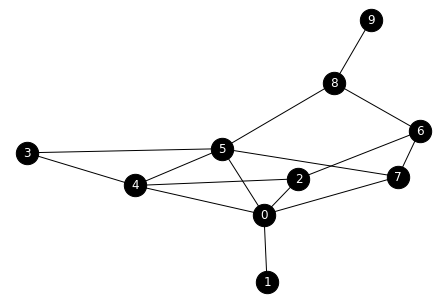

In [ ]:
# let's consider the network in Exercise 14
G = nx.Graph()
# let's set the index of source node = 0, while the destination node = 9
src_node = 0
dst_node = 9
G.add_edges_from([(1, src_node),(2, src_node), (2,4), (2,6), (3,4), (3,5), (4,5), (4, src_node),(5,7),
                 (5,8), (5, src_node), (6,7), (6,8), (7, src_node), (8, dst_node)])
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white")
plt.show()


In [ ]:
# Let's implement the pseudocode of Algorithm 1: Breadth-first search algorithm with backtracking
def bfs_with_backtracking(G, src_node, dst_node):
    # initializations
    num_nodes = len(G.nodes)
    visited = [False] * num_nodes
    parent = [-1] * num_nodes
    found = False
    Q = []

    # add source node to Q and mark it as visited
    Q.append(src_node)
    visited[src_node] = True
    count = 1
    while(len(Q) > 0):
      print("step", count)
      count += 1
      print("visited", visited)
      print("parent", parent)
      # remove the front node of the queue and assign it to v
      v = Q.pop(0)
      if v == dst_node:
        found = True
        break
      neighbors = list(G.neighbors(v))
      for w in neighbors:
        if(visited[w] == False):
          # put w to the back of the queue
          Q.append(w)
          visited[w] = True
          parent[w] = v
    
    if found == True:
      path = backtracking(parent, src_node, dst_node)
    else:
      print("No path between %d and %d"%(src_node, dst_node))
      path = []
    return path

def backtracking(parent, src_node, dst_node):
    path = []
    now_node = dst_node
    now_parent = parent[now_node]
    while(now_node != src_node):
      path.append(now_node)
      now_node = now_parent
      now_parent = parent[now_node]
    path.append(src_node)
    return path




In [ ]:
# let's call the function
print("running bfs with backtracking")
path = bfs_with_backtracking(G, src_node, dst_node)
print("One of the shortest path is", path)

running bfs with backtracking
step 1
visited [True, False, False, False, False, False, False, False, False, False]
parent [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
step 2
visited [True, True, True, False, True, True, False, True, False, False]
parent [-1, 0, 0, -1, 0, 0, -1, 0, -1, -1]
step 3
visited [True, True, True, False, True, True, False, True, False, False]
parent [-1, 0, 0, -1, 0, 0, -1, 0, -1, -1]
step 4
visited [True, True, True, False, True, True, True, True, False, False]
parent [-1, 0, 0, -1, 0, 0, 2, 0, -1, -1]
step 5
visited [True, True, True, True, True, True, True, True, False, False]
parent [-1, 0, 0, 4, 0, 0, 2, 0, -1, -1]
step 6
visited [True, True, True, True, True, True, True, True, True, False]
parent [-1, 0, 0, 4, 0, 0, 2, 0, 5, -1]
step 7
visited [True, True, True, True, True, True, True, True, True, False]
parent [-1, 0, 0, 4, 0, 0, 2, 0, 5, -1]
step 8
visited [True, True, True, True, True, True, True, True, True, False]
parent [-1, 0, 0, 4, 0, 0, 2, 0, 5, -1]


## 3.2 Dijkstra’s algorithm
If the network is weighted, we need to use the Dijkstra's algorithm.

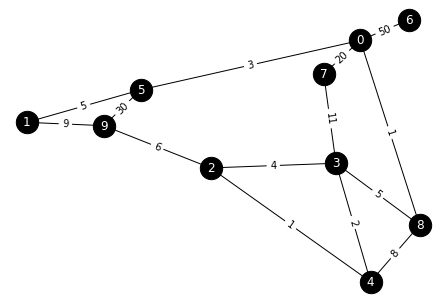

In [ ]:
# let's consider the weighted network in Exercise 16
G = nx.Graph()
# let's set the index of source node = 0, while the destination node = 9
src_node = 0
dst_node = 9
G.add_weighted_edges_from([(src_node, 5, 3), (src_node, 6, 50), (src_node, 7, 20), 
                           (src_node, 8, 1), (1, 5, 5), (1, 9, 9), (2,3,4),
                           (2,4,1), (2, dst_node, 6), (3,4,2), (3,7,11),
                           (3,8,5), (4,8,8), (5, dst_node, 30)])

# get positions of nodes, here we use a spring layout, note we also use a random seed for reproducibility
spring_pos=nx.spring_layout(G, seed=123)
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white", pos=spring_pos)

# draw edge labels
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, spring_pos, edge_labels=edge_labels)
plt.show()

In [ ]:
#let's implement the pseudocode of algorithm 2: Dijkstra's algorithm with backtracking
src_node = 0
dst_node = 9
# note we don't pass weights separately because it's contained in G
def dijkstra_with_backtracking(G, src_node, dst_node):
    nodes = list(G.nodes)
    num_nodes = len(nodes)
    parent = [-1] * num_nodes
    distance = [np.inf] * num_nodes
    distance[src_node] = 0
    
    count = 1
    while(len(nodes) > 0):
      print("step %d"%count)
      print("parent", parent)
      print("distance", distance)
      count += 1

      # find the node with the smallest distance
      min_dist = np.inf
      v = -1
      for n in nodes:
        now_dist = distance[n]
        if now_dist < min_dist:
          min_dist = now_dist
          v = n
      nodes.remove(v)
      
      if v == dst_node:
        break
      neighbors = G.neighbors(v)
      for w in neighbors:
        alt = distance[v] + G[v][w]['weight']  
        if alt < distance[w]:
          distance[w] = alt
          parent[w] = v
    if distance[dst_node] == np.inf:
        print("no shortest path is found")
        path = []
    else:
        print("distance of the shortest path = %d"%distance[dst_node])
        path = backtracking(parent, src_node, dst_node)
    
    return path

path = dijkstra_with_backtracking(G, src_node, dst_node)
print("shortest path: ", path)

step 1
parent [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
distance [0, inf, inf, inf, inf, inf, inf, inf, inf, inf]
step 2
parent [-1, -1, -1, -1, -1, 0, 0, 0, 0, -1]
distance [0, inf, inf, inf, inf, 3, 50, 20, 1, inf]
step 3
parent [-1, -1, -1, 8, 8, 0, 0, 0, 0, -1]
distance [0, inf, inf, 6, 9, 3, 50, 20, 1, inf]
step 4
parent [-1, 5, -1, 8, 8, 0, 0, 0, 0, 5]
distance [0, 8, inf, 6, 9, 3, 50, 20, 1, 33]
step 5
parent [-1, 5, 3, 8, 3, 0, 0, 3, 0, 5]
distance [0, 8, 10, 6, 8, 3, 50, 17, 1, 33]
step 6
parent [-1, 5, 3, 8, 3, 0, 0, 3, 0, 1]
distance [0, 8, 10, 6, 8, 3, 50, 17, 1, 17]
step 7
parent [-1, 5, 4, 8, 3, 0, 0, 3, 0, 1]
distance [0, 8, 9, 6, 8, 3, 50, 17, 1, 17]
step 8
parent [-1, 5, 4, 8, 3, 0, 0, 3, 0, 2]
distance [0, 8, 9, 6, 8, 3, 50, 17, 1, 15]
distance of the shortest path = 15
shortest path:  [9, 2, 4, 3, 8, 0]
